# Model test
***
Test DenseNet 

In [13]:
# Libraries

import os
from PIL import Image
import itertools

import cv2
import numpy as np 
import pandas as pd 
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator


import warnings
warnings.filterwarnings('ignore')

print('Modules Successfully Loaded')

Modules Successfully Loaded


## Dataframe to split train and test and validation

In [14]:
data_dir= "./Multi-class Weather Dataset"
paths = []
labels = []
folds = os.listdir(data_dir)
for fold in folds :
    condition_path = data_dir +"/" + fold
    all_pic = os.listdir(condition_path)
    for each_pic in all_pic:
        each_pic_path = condition_path +"/" + each_pic
        paths.append(each_pic_path)
        labels.append(fold)
        
pseries = pd.Series(paths, name='Picture Path')
lseries = pd.Series(labels, name='Label')

df = pd.concat([pseries, lseries], axis =1)
df.head()

,Picture Path,Label
0,./Multi-class Weather Dataset/Cloudy/cloudy1.jpg,Cloudy
1,./Multi-class Weather Dataset/Cloudy/cloudy10.jpg,Cloudy
2,./Multi-class Weather Dataset/Cloudy/cloudy100...,Cloudy
3,./Multi-class Weather Dataset/Cloudy/cloudy101...,Cloudy
4,./Multi-class Weather Dataset/Cloudy/cloudy102...,Cloudy


In [15]:
train_set, t_v_set = train_test_split(df, test_size=0.2, shuffle=True, stratify=df["Label"], random_state=42)
test_set, val_set = train_test_split(t_v_set, test_size=0.5, shuffle=True, stratify=t_v_set["Label"], random_state=42)

In [16]:
train_set.head()

,Picture Path,Label
296,./Multi-class Weather Dataset/Cloudy/cloudy96.jpg,Cloudy
413,./Multi-class Weather Dataset/Rain/rain200.jpg,Rain
605,./Multi-class Weather Dataset/Shine/shine180.jpg,Shine
292,./Multi-class Weather Dataset/Cloudy/cloudy92.jpg,Cloudy
555,./Multi-class Weather Dataset/Shine/shine135.jpg,Shine


In [17]:
test_set.head()

,Picture Path,Label
273,./Multi-class Weather Dataset/Cloudy/cloudy75.jpg,Cloudy
715,./Multi-class Weather Dataset/Shine/shine51.jpg,Shine
710,./Multi-class Weather Dataset/Shine/shine47.jpg,Shine
959,./Multi-class Weather Dataset/Sunrise/sunrise2...,Sunrise
615,./Multi-class Weather Dataset/Shine/shine19.jpg,Shine


In [18]:
val_set.sample(10)

,Picture Path,Label
54,./Multi-class Weather Dataset/Cloudy/cloudy148...,Cloudy
298,./Multi-class Weather Dataset/Cloudy/cloudy98.jpg,Cloudy
303,./Multi-class Weather Dataset/Rain/rain101.jpg,Rain
43,./Multi-class Weather Dataset/Cloudy/cloudy138...,Cloudy
1026,./Multi-class Weather Dataset/Sunrise/sunrise3...,Sunrise
724,./Multi-class Weather Dataset/Shine/shine6.jpg,Shine
1019,./Multi-class Weather Dataset/Sunrise/sunrise3...,Sunrise
366,./Multi-class Weather Dataset/Rain/rain159.jpg,Rain
398,./Multi-class Weather Dataset/Rain/rain188.jpg,Rain
731,./Multi-class Weather Dataset/Shine/shine66.jpg,Shine


## Image Data generator 

In [19]:
batch_size = 64
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

print("Train Set:")
train_gen = tr_gen.flow_from_dataframe(train_set, x_col='Picture Path', y_col='Label', target_size=img_size, class_mode='categorical',
                                       color_mode='rgb', shuffle=True, batch_size=batch_size)


print("Val Set:")
valid_gen = ts_gen.flow_from_dataframe(val_set, x_col='Picture Path', y_col='Label', target_size=img_size, class_mode='categorical',
                                       color_mode='rgb', shuffle=True, batch_size=batch_size)


print("Test Set:")
test_gen = ts_gen.flow_from_dataframe(test_set, x_col='Picture Path', y_col='Label', target_size=img_size, class_mode='categorical',
                                      color_mode='rgb', shuffle=False, batch_size=batch_size)


Train Set:
Found 900 validated image filenames belonging to 4 classes.
Val Set:
Found 113 validated image filenames belonging to 4 classes.
Test Set:
Found 112 validated image filenames belonging to 4 classes.


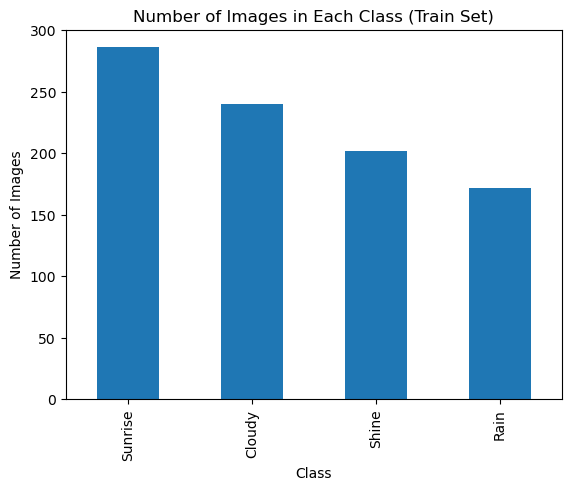

In [20]:

class_counts = train_set['Label'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class (Train Set)')
plt.show() 


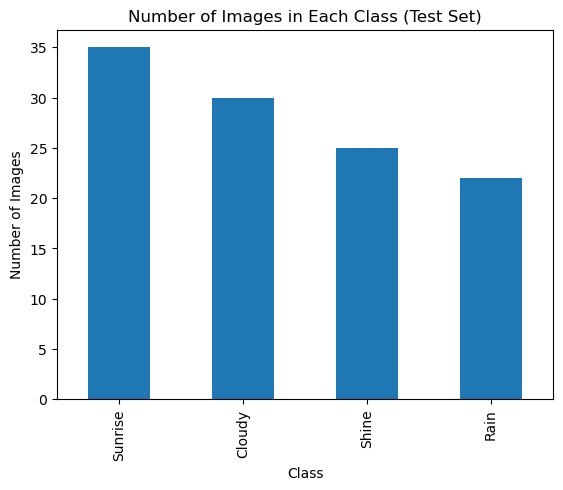

In [21]:
class_counts = test_set['Label'].value_counts()
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Class (Test Set)')
plt.show()

## Visualize data

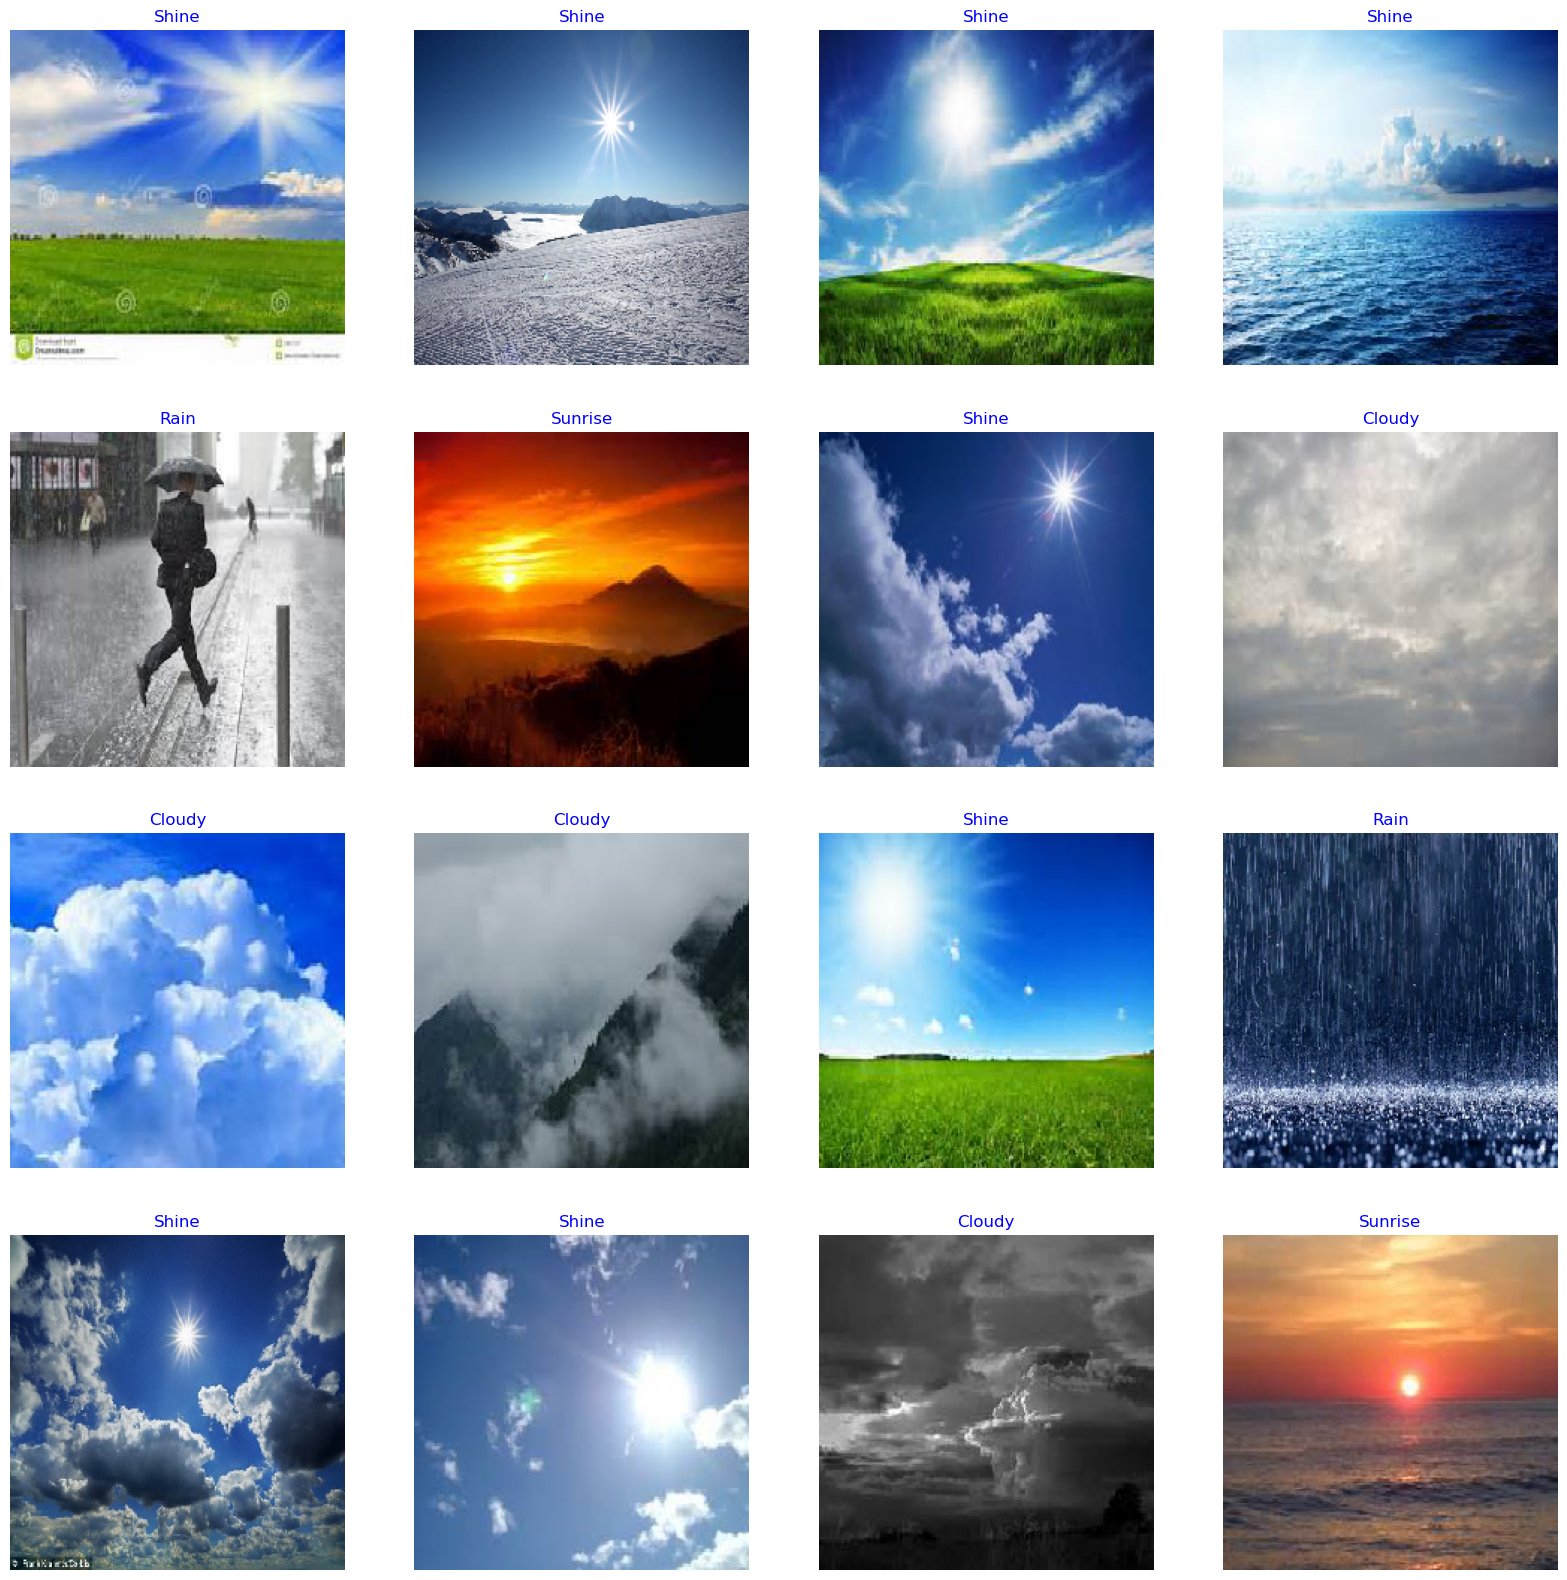

In [22]:
g_dict = train_gen.class_indices  
classes = list(g_dict.keys())    
images, labels = next(train_gen)     
plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       
    plt.imshow(image)
    index = np.argmax(labels[i])  
    class_name = classes[index]   
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

# Model 